In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline

In [2]:
import os
def load_images_from_folder(database):
    paths = []
    for filename in os.listdir(database):
        paths.append(database+'/'+filename)
    return paths

In [3]:
startpath = "database"
corpus_path = sorted([os.path.join("c:","database", directories) for directories in os.listdir(startpath)])

images = []
path = startpath
for f in ['9444427','9491931','1037293','4475099']:
    images += load_images_from_folder(path+'/'+f)
print(images[0])

database/9444427/d169s0004.jpg


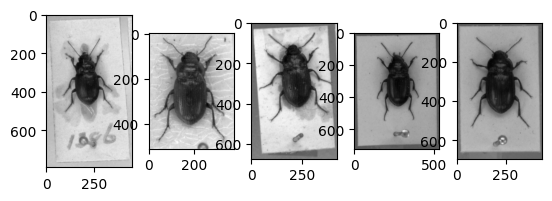

In [4]:
def imshow(im):
    plt.imshow(im,cmap='gray')
    plt.show() 

fig, pltx = plt.subplots(1, 5)
for i in range(5):
    imgtest = cv2.imread(images[i],0)
    pltx[i].imshow(imgtest,cmap='gray')
plt.show() 

In [5]:
imgtest=cv2.imread(images[0],0)

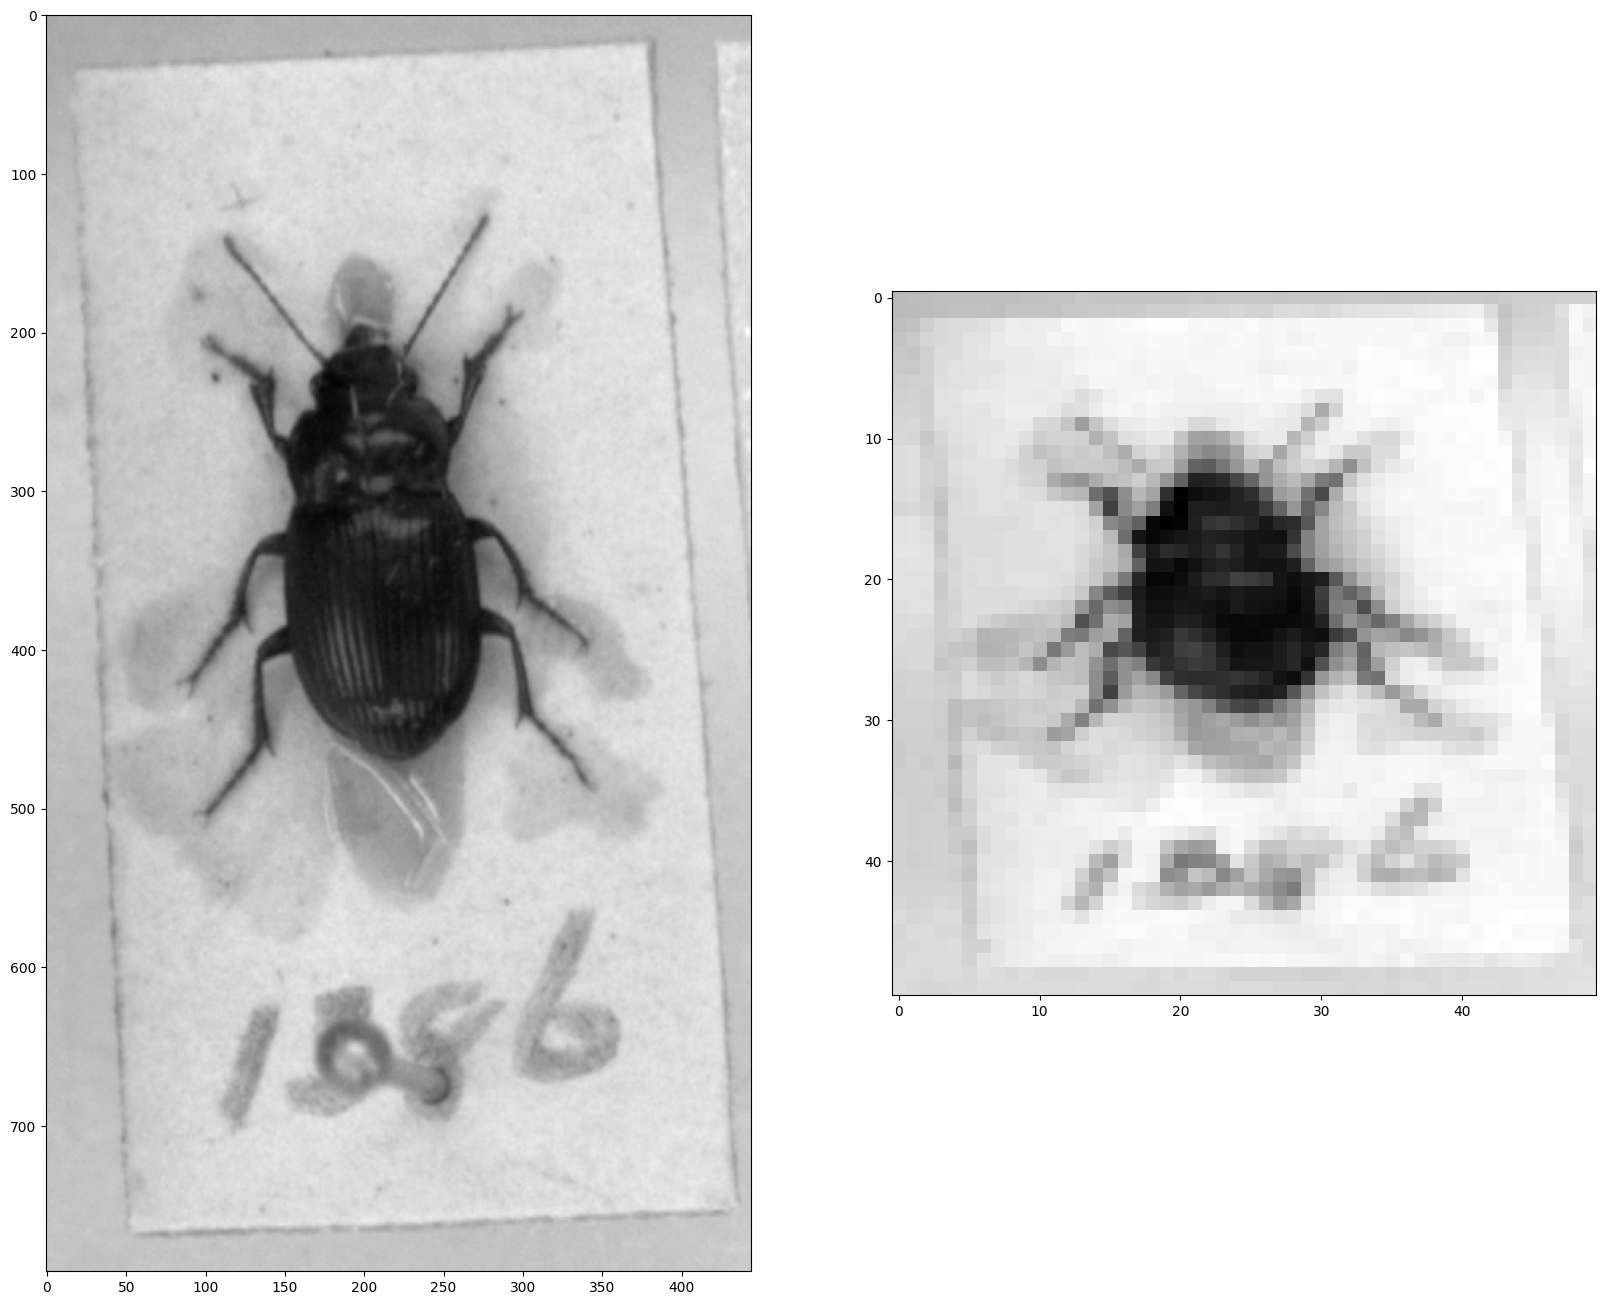

In [6]:
def resize(mat):
    mat2 = cv2.resize(mat, (50,50), interpolation = cv2.INTER_AREA);
    return mat2

fig, pltx = plt.subplots(1, 2,figsize=(20,20))
pltx[0].imshow(imgtest, cmap='gray');
pltx[1].imshow(resize(imgtest), cmap='gray');
plt.show();

0
255
53
171


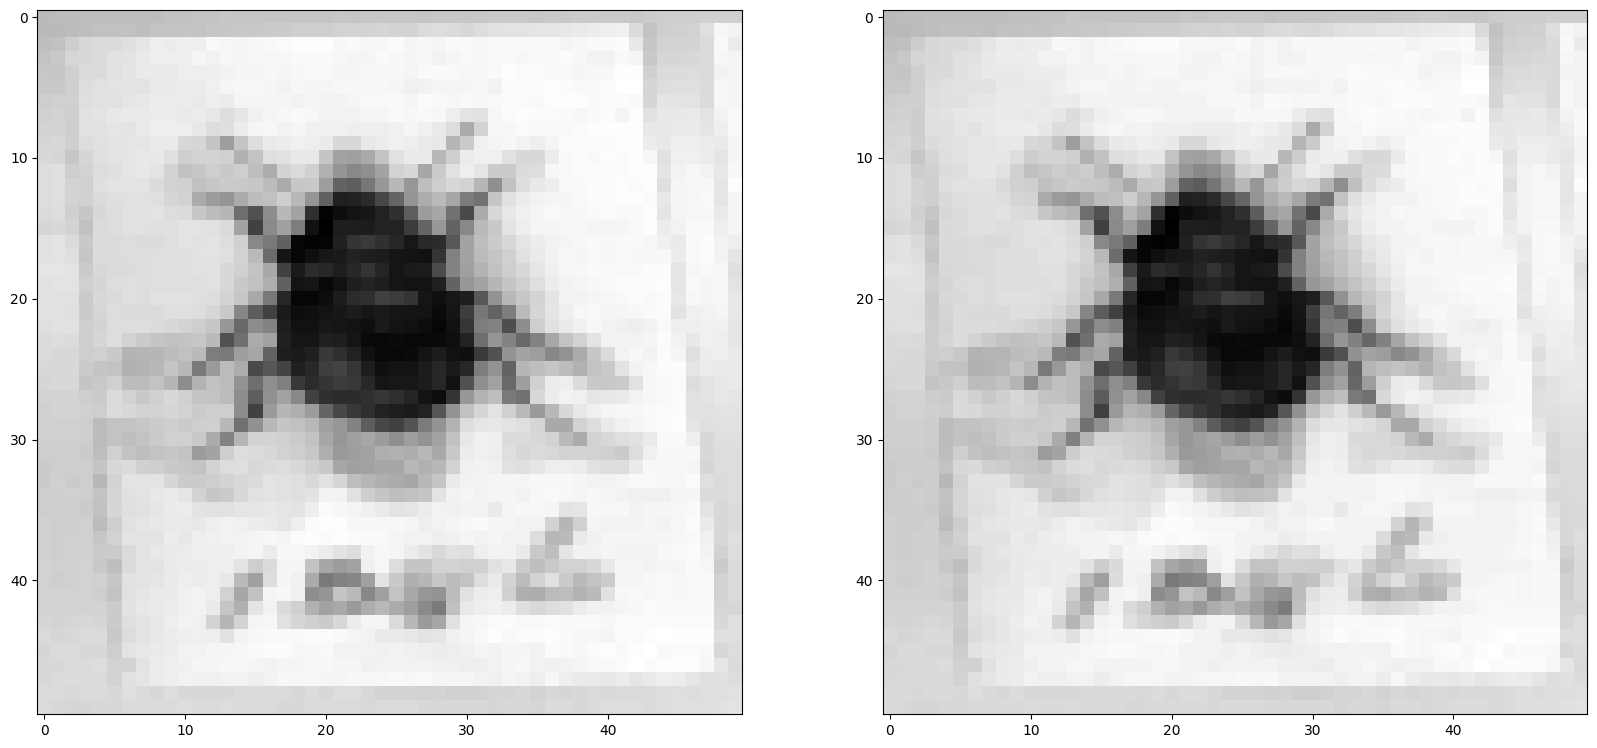

In [7]:
def linearContrast(mat):
    floatmat = np.float32(mat);
    contrastFloatMat = (((floatmat)-mat.min())*255/(mat.max()-mat.min()))
    return np.uint8(contrastFloatMat)

print(linearContrast(resize(imgtest)).min())
print(linearContrast(resize(imgtest)).max())
print(resize(imgtest).min())
print(resize(imgtest).max())
fig, pltx = plt.subplots(1, 2,figsize=(20,20))
pltx[0].imshow(resize(imgtest), cmap='gray');
pltx[1].imshow(linearContrast(resize(imgtest)), cmap='gray');
plt.show();

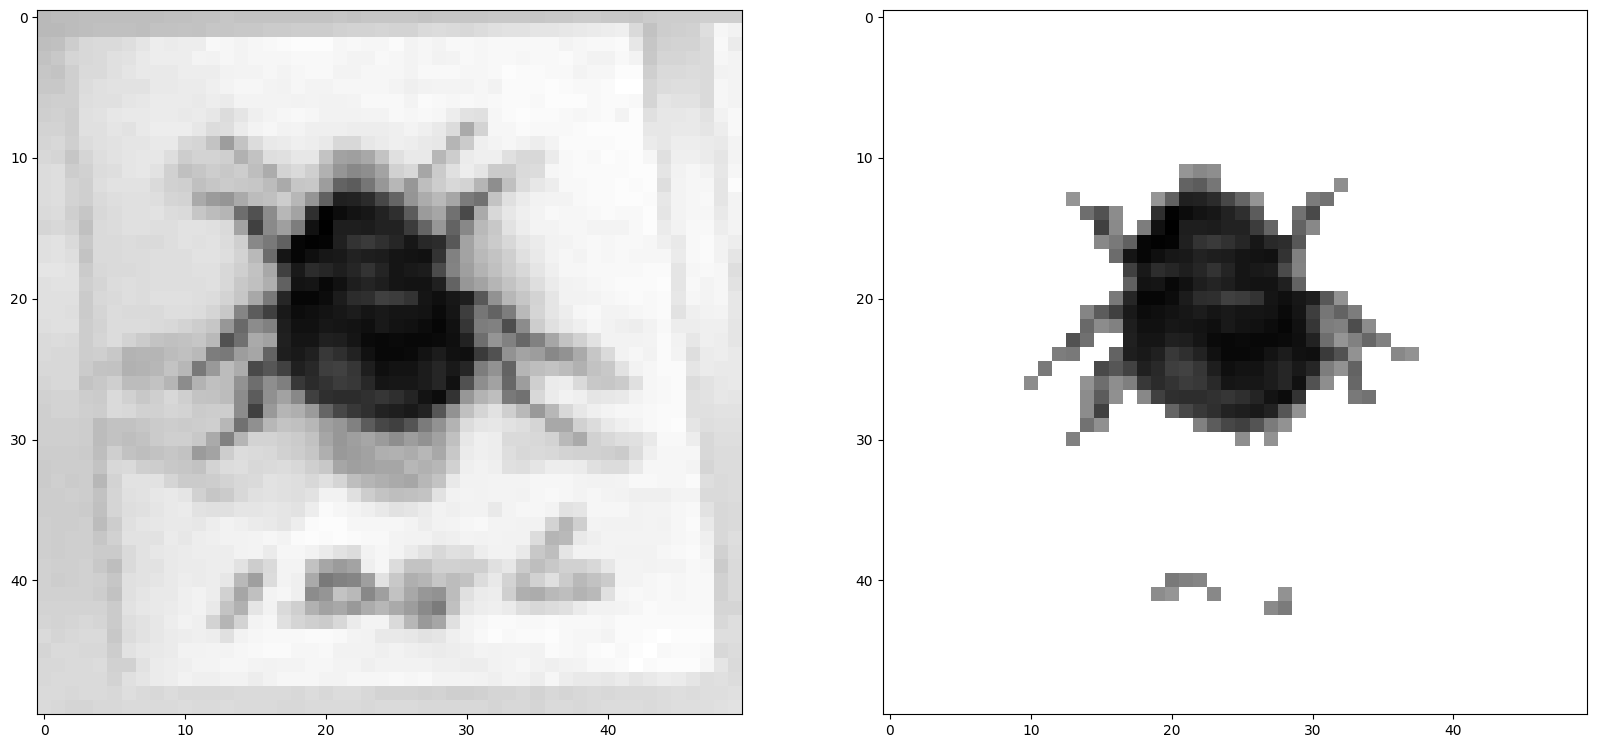

In [8]:
def tryDropBackground(mat):
    bgr = cv2.split(mat);
    alpha = (bgr[0]-bgr[0]+255)*(bgr[0]<=150);
    mat2 = cv2.merge([bgr[0],bgr[0],bgr[0],alpha]);
    return mat2
tmat = tryDropBackground(linearContrast(imgtest))

fig, pltx = plt.subplots(1, 2,figsize=(20,20))
pltx[0].imshow(linearContrast(resize(imgtest)), cmap='gray');
pltx[1].imshow(tryDropBackground(linearContrast(resize(imgtest))), cmap='gray');
plt.show();

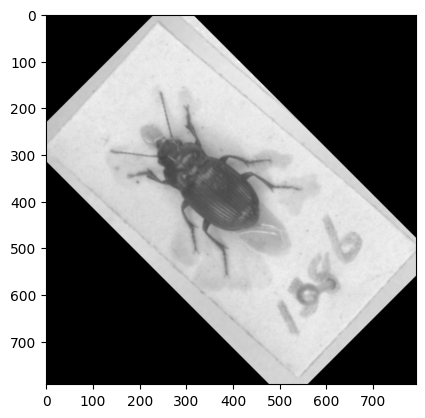

In [9]:
def getRotatedPhoto(mat,angle):
    h,w = mat.shape[:2]
    M2 = np.array([[1, 0, (max(w, h)-w)//2],[ 0, 1, (max(w, h)-h)//2]],dtype=np.float32);
    mat = cv2.warpAffine(mat, M2, (max(w, h),max(w, h)))
    M = cv2.getRotationMatrix2D((max(w, h)//2,max(w, h)//2), angle, 1)
    mat = cv2.warpAffine(mat, M, (max(w, h),max(w, h)))
    return mat

imshow(getRotatedPhoto(imgtest,45))

595


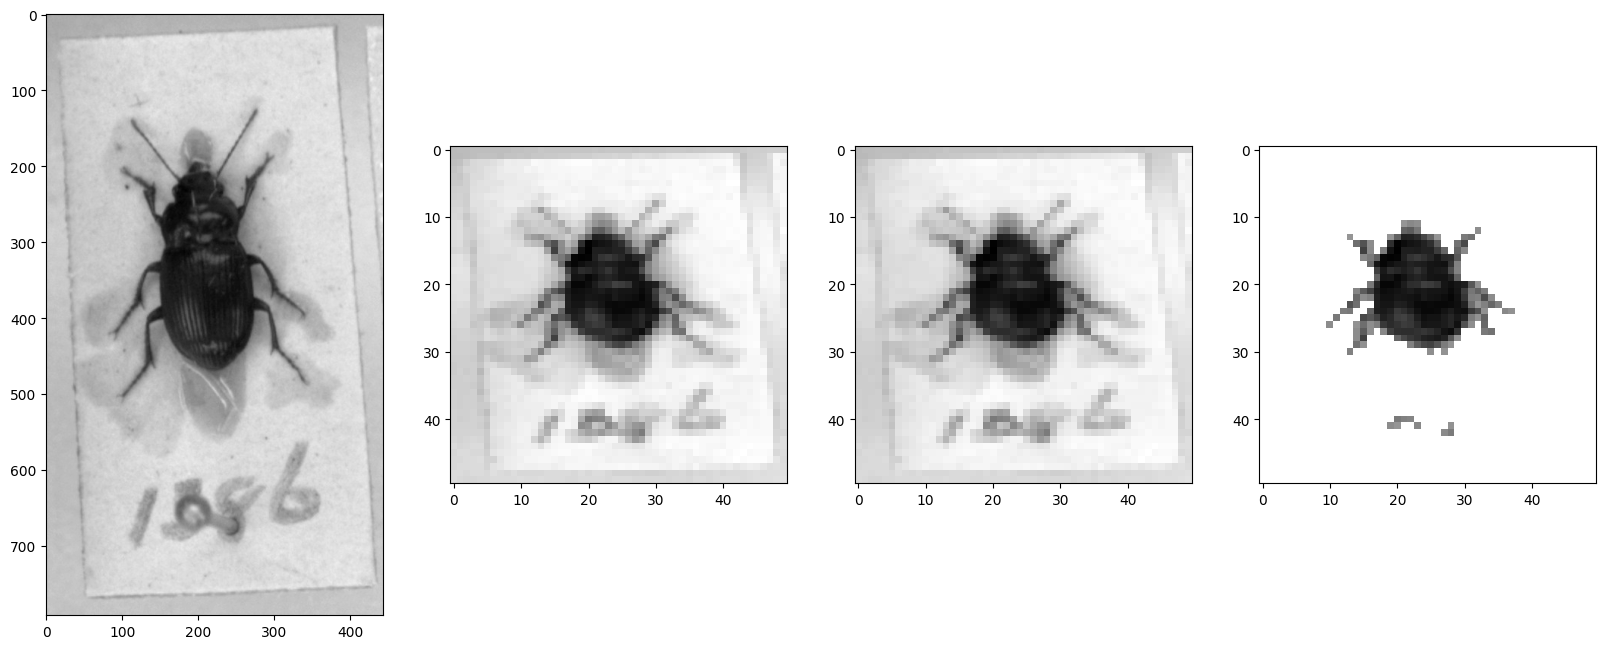

In [10]:
i=0
print(len(images))
imagepath = images[0]
i+=1
fig, pltx = plt.subplots(1, 4,figsize=(20,20))

mat = imgtest;                                                    pltx[0].imshow(mat, cmap='gray');
mat = resize(mat);                                                pltx[1].imshow(mat, cmap='gray'); 
mat = linearContrast(mat);                                        pltx[2].imshow(mat, cmap='gray');
mat = tryDropBackground(mat);                                     pltx[3].imshow(mat, cmap='gray');
plt.show();
cv2.imwrite("../working/"+str(i)+"_"+str(45)+".png",mat);

In [11]:
import math
def pointRotate(x,y,angle):
    dist = math.hypot(x,y)    
    angle2 = math.atan2(y,x)
    x2 = dist*math.cos(angle*3.14/180+angle2)    
    y2 = -dist*math.sin(angle*3.14/180+angle2)
    return (int(x2),int(y2))
pointRotate(0,10,90)

(-9, 0)

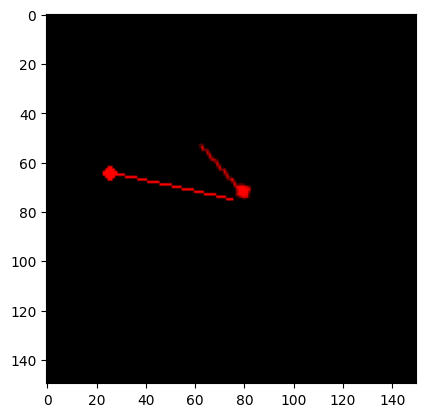

In [12]:
rmat=np.zeros((150,100,3),np.uint8)
x=50
y=80
angle = 120
cv2.line(rmat,(x,y),(75,75),(255,0,0),1)
cv2.rectangle(rmat,(x,y),(x+1,y+1),(255,0,0),3)
rmat=getRotatedPhoto(rmat,angle)
(x,y)=pointRotate(x-50,y-50,angle)
x=x+50
y=y+50
cv2.line(rmat,(x,y),(75,75),(255,0,0),1)
cv2.rectangle(rmat,(x,y),(x+1,y+1),(255,0,0),3)
imshow(rmat)

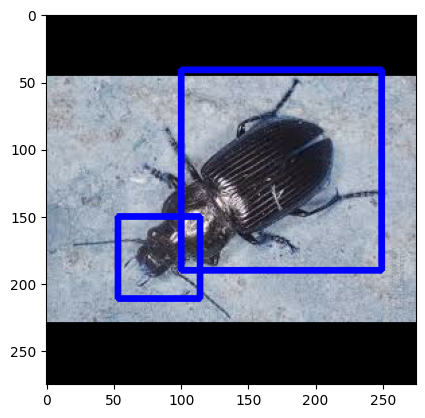

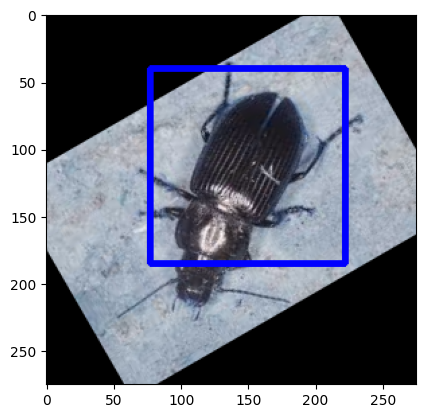

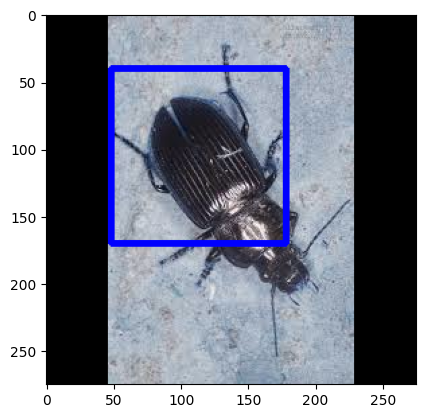

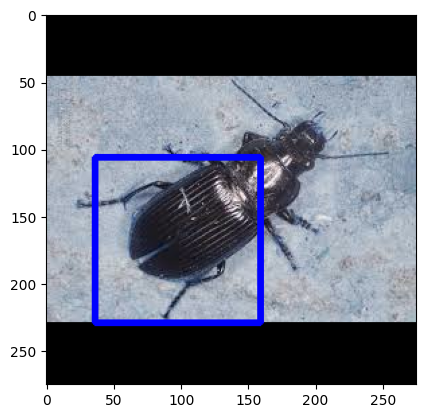

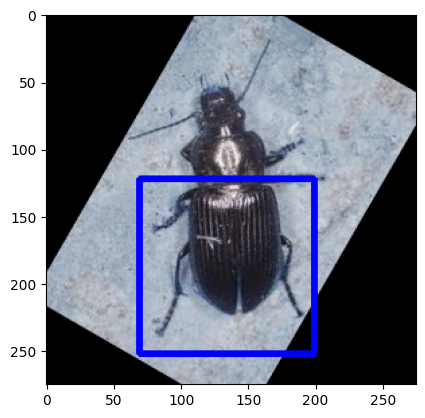

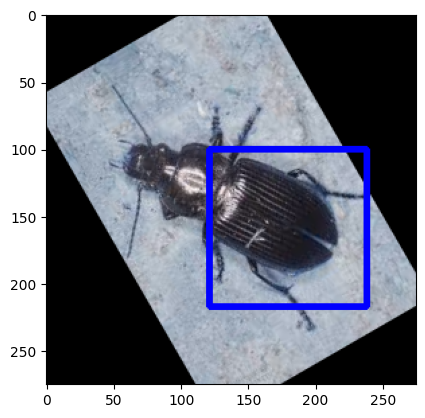

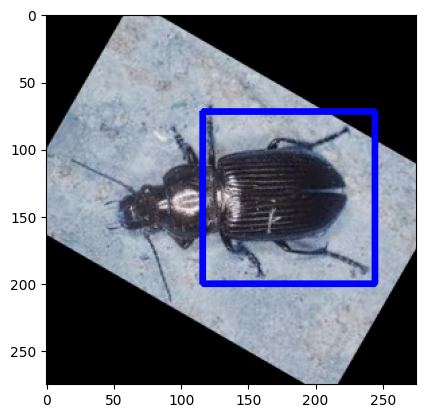

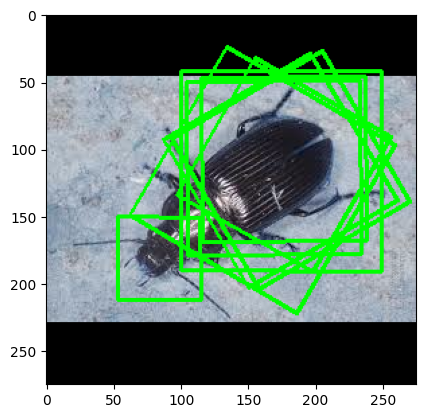

In [13]:
cascade = cv2.CascadeClassifier()
cascade.load("cascade.xml")

mat = getRotatedPhoto(cv2.imread("insects/1.jpg"),0)
mat2 = linearContrast(mat);
for i in range(0,360,30):
    mat3 = getRotatedPhoto(mat2,i)
    rectangles = cascade.detectMultiScale(mat3)
    mat4 = getRotatedPhoto(mat2,i)
    for (x,y,w,h) in rectangles:
        cv2.rectangle(mat4,(x,y),(x+w,y+h),(0,0,255),3)
        x2=x
        y2=y+h
        x3=x+w
        y3=y+h
        x4=x+w
        y4=y
        centerx = mat3.shape[:2][0]//2
        centery = mat3.shape[:2][1]//2
        x-=centerx
        y-=centery
        x2-=centerx
        y2-=centery
        x3-=centerx
        y3-=centery
        x4-=centerx
        y4-=centery
        x,y=pointRotate(x,y,i)            
        x2,y2=pointRotate(x2,y2,i)
        x3,y3=pointRotate(x3,y3,i)
        x4,y4=pointRotate(x4,y4,i)
        x+=centerx
        y+=centery
        x2+=centerx
        y2+=centery
        x3+=centerx
        y3+=centery
        x4+=centerx
        y4+=centery
        cv2.line(mat,(x,mat3.shape[:2][0]-y),(x2,mat3.shape[:2][0]-y2),(0,255,0),2)
        cv2.line(mat,(x2,mat3.shape[:2][0]-y2),(x3,mat3.shape[:2][0]-y3),(0,255,0),2)
        cv2.line(mat,(x3,mat3.shape[:2][0]-y3),(x4,mat3.shape[:2][0]-y4),(0,255,0),2)
        cv2.line(mat,(x4,mat3.shape[:2][0]-y4),(x,mat3.shape[:2][0]-y),(0,255,0),2)
    if len(rectangles) > 0:
        plt.imshow(mat4)
        plt.show()
imshow(mat)

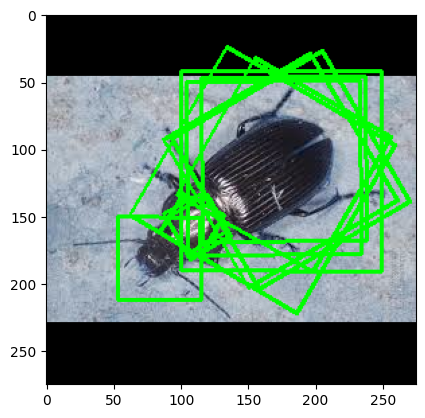

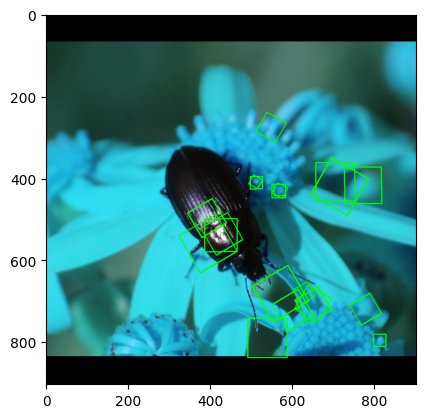

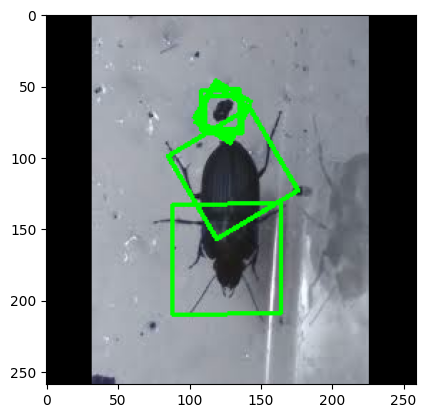

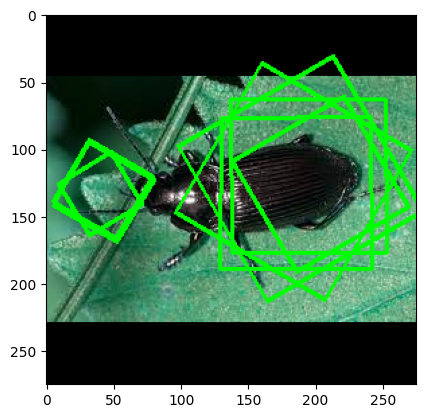

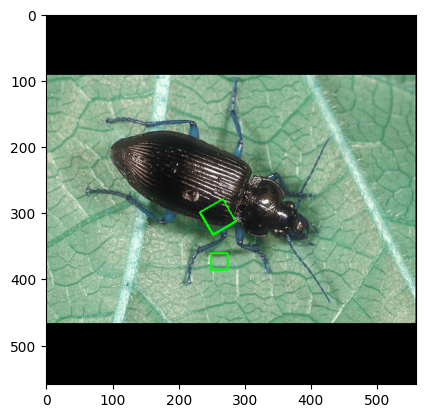

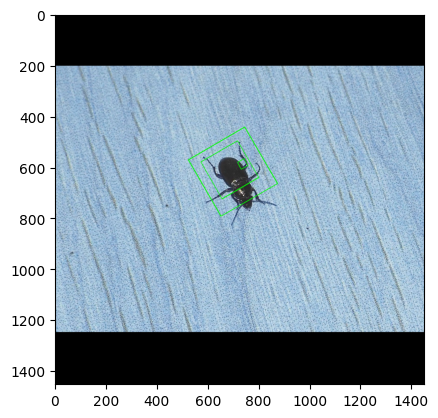

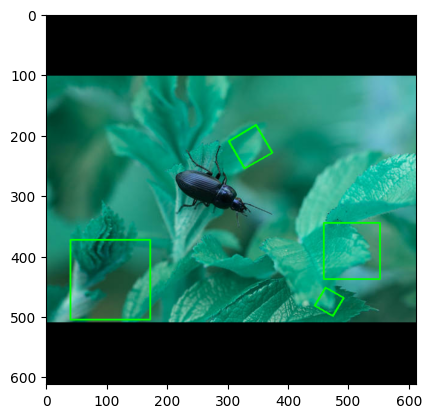

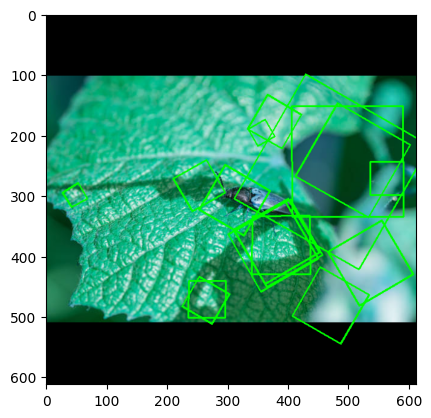

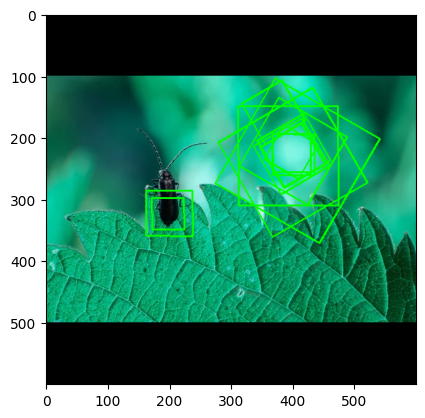

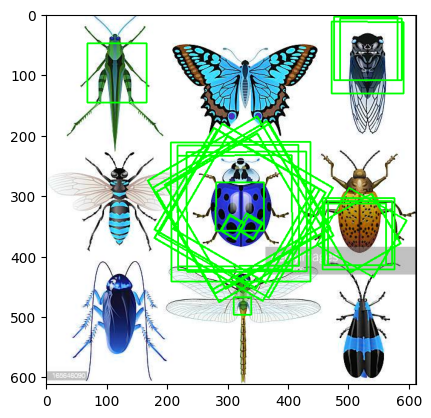

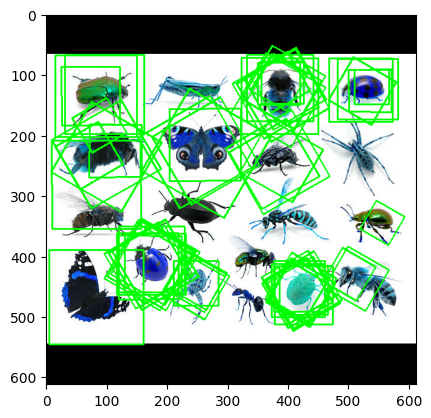

In [14]:
cascade = cv2.CascadeClassifier()
cascade.load("cascade.xml")
filenames = os.listdir("insects")
for filename in filenames:
    mat = getRotatedPhoto(cv2.imread("../New folder/insects/"+filename),0)
    mat2 = linearContrast(mat);
    for i in range(0,360,30):
        mat3 = getRotatedPhoto(mat2,i)
        rectangles = cascade.detectMultiScale(mat3)
        for (x,y,w,h) in rectangles:
            x2=x
            y2=y+h
            x3=x+w
            y3=y+h
            x4=x+w
            y4=y
            centerx = mat3.shape[:2][0]//2            
            centery = mat3.shape[:2][1]//2
            x-=centerx
            y-=centery
            x2-=centerx
            y2-=centery
            x3-=centerx
            y3-=centery
            x4-=centerx
            y4-=centery
            x,y=pointRotate(x,y,i)            
            x2,y2=pointRotate(x2,y2,i)
            x3,y3=pointRotate(x3,y3,i)
            x4,y4=pointRotate(x4,y4,i)
            x+=centerx
            y+=centery
            x2+=centerx
            y2+=centery
            x3+=centerx
            y3+=centery
            x4+=centerx
            y4+=centery
            cv2.line(mat,(x,mat3.shape[:2][0]-y),(x2,mat3.shape[:2][0]-y2),(0,255,0),2)      
            cv2.line(mat,(x2,mat3.shape[:2][0]-y2),(x3,mat3.shape[:2][0]-y3),(0,255,0),2)
            cv2.line(mat,(x3,mat3.shape[:2][0]-y3),(x4,mat3.shape[:2][0]-y4),(0,255,0),2)
            cv2.line(mat,(x4,mat3.shape[:2][0]-y4),(x,mat3.shape[:2][0]-y),(0,255,0),2)
    mat2 = 255-mat2
    for i in range(0,360,30):
        mat3 = getRotatedPhoto(mat2,i)
        rectangles = cascade.detectMultiScale(mat3)
        for (x,y,w,h) in rectangles:
            x2=x
            y2=y+h
            x3=x+w
            y3=y+h
            x4=x+w
            y4=y
            centerx = mat3.shape[:2][0]//2
            centerx = mat3.shape[:2][1]//2
            x-=centerx
            y-=centery
            x2-=centerx
            y2-=centery
            x3-=centerx
            y3-=centery
            x4-=centerx
            y4-=centery
            x,y=pointRotate(x,y,i)            
            x2,y2=pointRotate(x2,y2,i)
            x3,y3=pointRotate(x3,y3,i)
            x4,y4=pointRotate(x4,y4,i)
            x+=centerx
            y+=centery
            x2+=centerx
            y2+=centery
            x3+=centerx
            y3+=centery
            x4+=centerx
            y4+=centery
            cv2.line(mat,(x,mat3.shape[:2][0]-y),(x2,mat3.shape[:2][0]-y2),(0,255,0),2)      
            cv2.line(mat,(x2,mat3.shape[:2][0]-y2),(x3,mat3.shape[:2][0]-y3),(0,255,0),2)
            cv2.line(mat,(x3,mat3.shape[:2][0]-y3),(x4,mat3.shape[:2][0]-y4),(0,255,0),2)
            cv2.line(mat,(x4,mat3.shape[:2][0]-y4),(x,mat3.shape[:2][0]-y),(0,255,0),2)
            
    plt.imshow(mat,cmap='gray')
    plt.show() 